In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

# Exploratory data analysis

## Loading the data

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         object
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [5]:
df_train.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,-6.695870,29.232100,24.842899,3.92134,18.447001,1.07547,3.09029,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,-6.474720,26.641399,24.138800,5.46991,20.510599,2.83354,7.10177,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,-0.088707,28.119900,26.891300,8.57886,23.162901,4.51993,12.70550,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,-0.256516,30.653601,24.247000,8.64310,19.961901,7.27575,11.45980,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,-1.953470,31.722601,25.155500,12.50030,18.746901,7.30976,8.00805,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965143 entries, 0 to 17965142
Data columns (total 28 columns):
id            int64
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
dtypes: float64(24), int64(3), object(1)
memory usage: 3.7+ GB


In [7]:
df_test.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,-187.080002,-33.183498,-4.220780,8.178160,33.160301,33.812500,21.744699,16.293800,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,-5.145290,6.395940,33.420101,-295.013000,8.373170,29.636400,16.223000,850.288025,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,-107.236000,12.845200,1.215280,13.317000,44.435101,37.585800,29.073000,22.316099,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,-8.021180,7.427430,27.345699,-310.165009,5.389070,27.733999,7.217500,816.679016,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,37.007900,-50.334202,-11.676400,-1.143860,-17.600500,34.075600,22.912399,19.033800,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


## Feature analysis

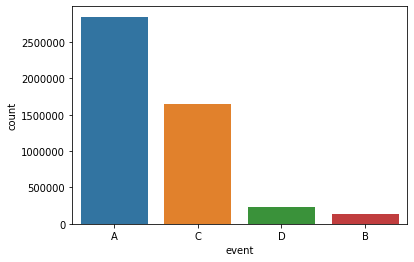

In [8]:
sns.countplot(df_train['event'])

#### Time

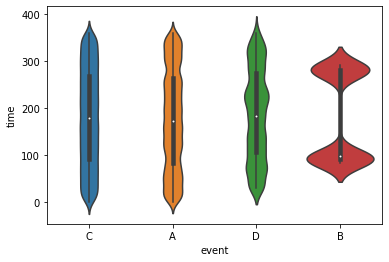

In [14]:
sns.violinplot(x='event', y='time', data=df_train.sample(100000))

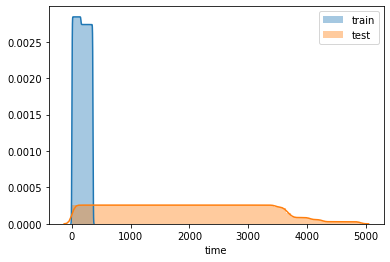

In [15]:
sns.distplot(df_train['time'], label='train')
sns.distplot(df_test['time'], label='test')
plt.legend()

#### Electroencephalogram recordings

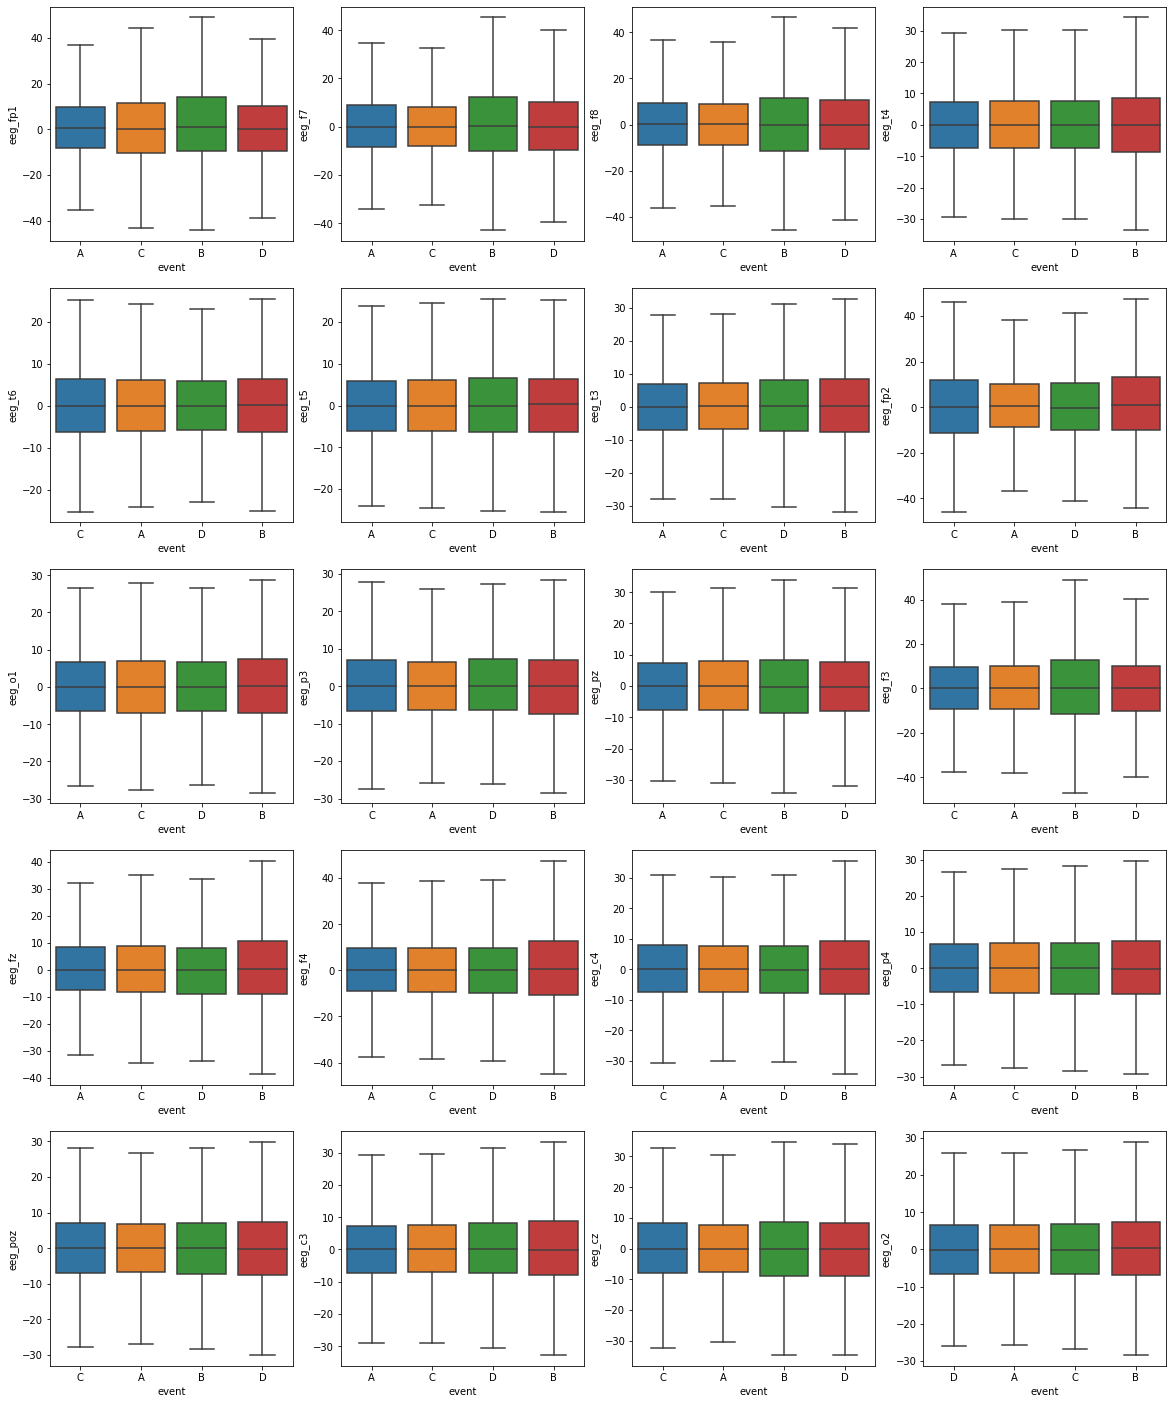

In [18]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", 
                "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

plt.figure(figsize=(20,25))
i = 0

for egg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.boxplot(x='event', y=egg, data=df_train.sample(100000), showfliers=False)

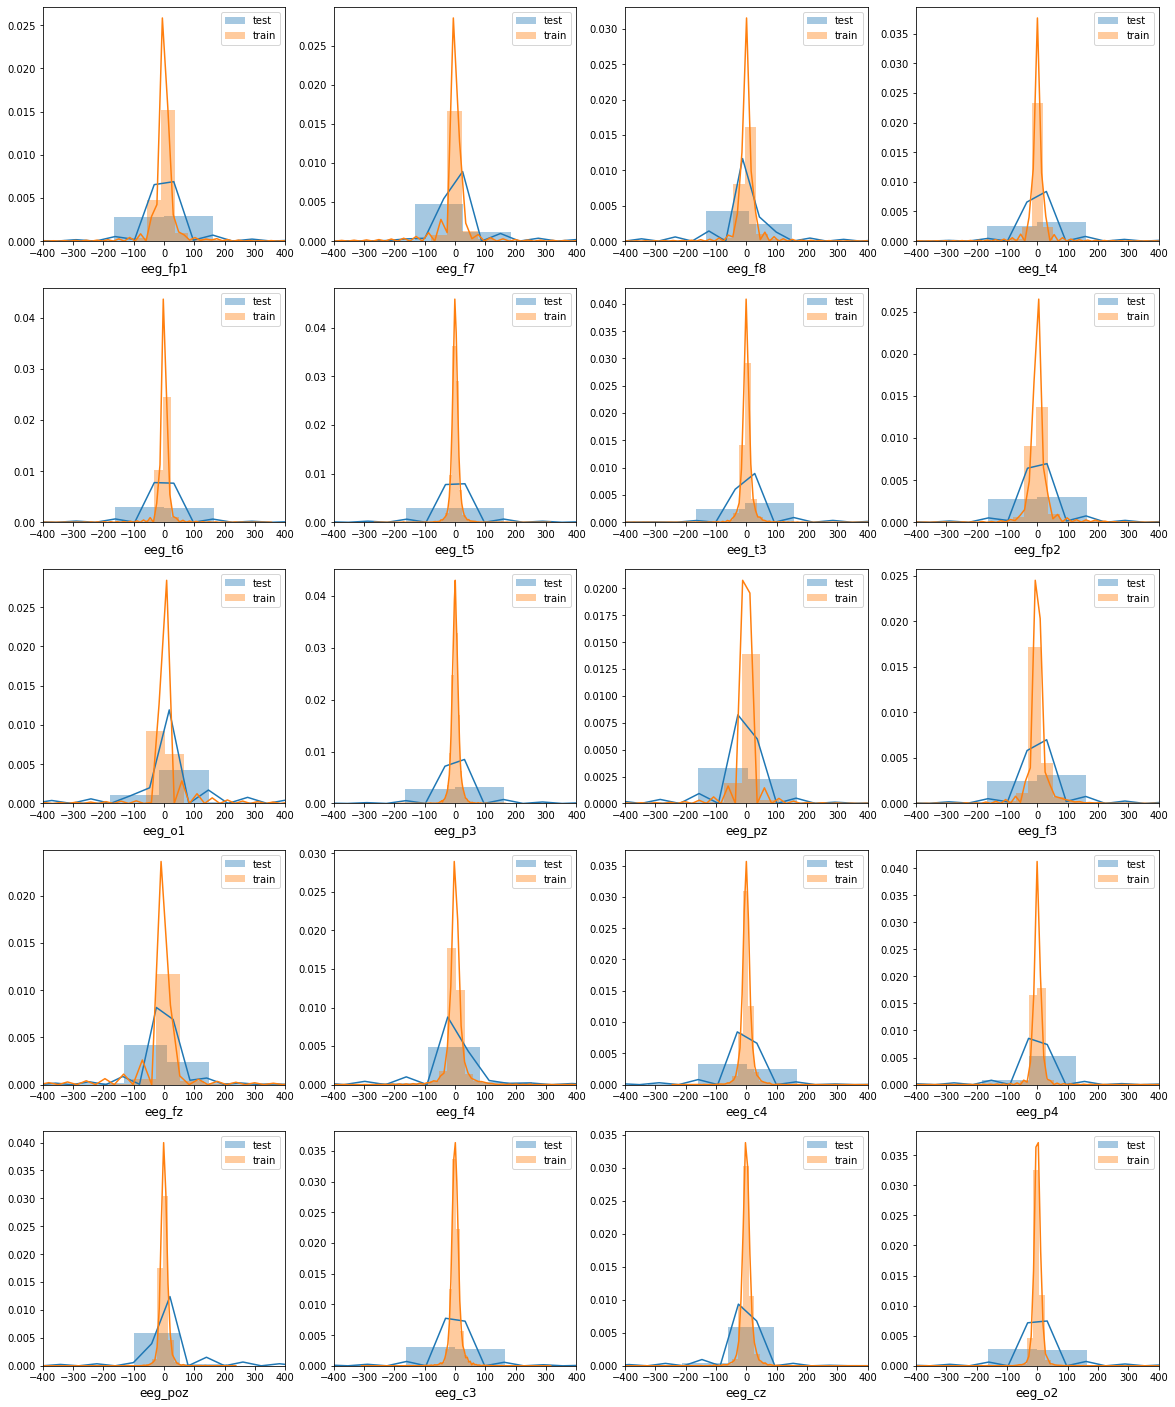

In [28]:
plt.figure(figsize=(20,25))
i = 0

for eeg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.distplot(df_test.sample(10000)[eeg], label='test')
    sns.distplot(df_train.sample(10000)[eeg], label='train')
    plt.xlim(-400, 400)
    plt.legend()
    plt.xlabel(eeg, fontsize=12)

#### Electrocardiogram

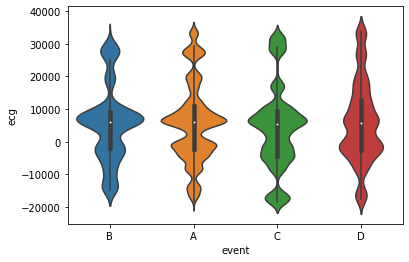

In [22]:
sns.violinplot(x='event', y='ecg', data=df_train.sample(100000))

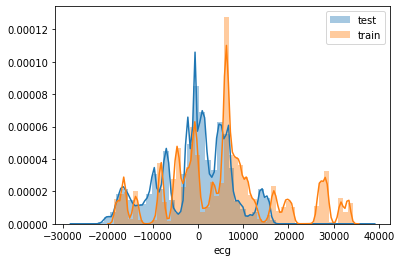

In [27]:
sns.distplot(df_test['ecg'], label='test')
sns.distplot(df_train['ecg'], label='train')
plt.legend()

#### Respiration

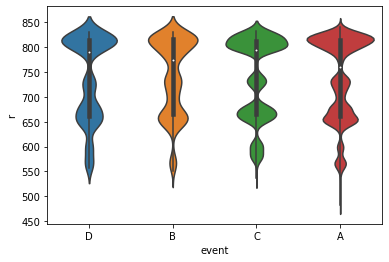

In [25]:
sns.violinplot(x='event', y='r', data=df_train.sample(100000))

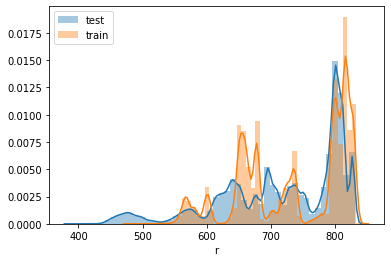

In [29]:
sns.distplot(df_test['r'], label='test')
sns.distplot(df_train['r'], label='train')
plt.legend()

#### Galvanic skin response

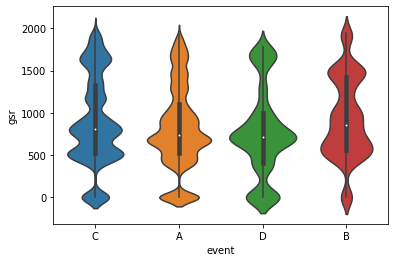

In [30]:
sns.violinplot(x='event', y='gsr', data=df_train.sample(100000))

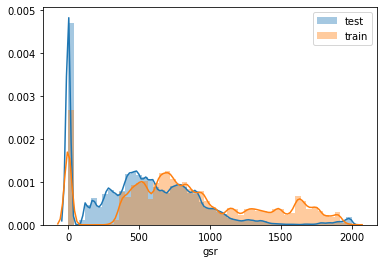

In [31]:
sns.distplot(df_test['gsr'], label='test')
sns.distplot(df_train['gsr'], label='train')
plt.legend()

#### Correlation matrix

In [17]:
corr_matrix = df_train.loc[:, 'eeg_fp1':'gsr'].corr()
corr_matrix

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
eeg_fp1,1.000000,0.649661,0.561712,0.434736,0.328606,0.332473,0.412335,0.808817,0.230432,0.432504,0.118993,0.390390,0.379386,0.346324,0.475388,0.426401,0.400337,0.537996,0.419241,0.295764,0.002471,0.001815,-0.005918
eeg_f7,0.649661,1.000000,0.493707,0.454118,0.309661,0.466838,0.510271,0.666813,0.158739,0.472020,0.050740,0.341315,0.282070,0.222679,0.385181,0.382612,0.435189,0.551835,0.392892,0.247659,0.000509,0.006118,0.001325
eeg_f8,0.561712,0.493707,1.000000,0.624069,0.428697,0.367796,0.361123,0.743647,0.201592,0.401075,0.048706,0.238039,0.341160,0.315901,0.540548,0.464684,0.411270,0.422634,0.360209,0.277458,-0.002611,0.003651,-0.000659
eeg_t4,0.434736,0.454118,0.624069,1.000000,0.537165,0.398861,0.509766,0.520755,0.271376,0.456478,0.091479,0.253911,0.321776,0.300402,0.447606,0.494782,0.428613,0.441985,0.333357,0.343796,0.001917,0.005457,-0.002319
eeg_t6,0.328606,0.309661,0.428697,0.537165,1.000000,0.496123,0.387109,0.370542,0.341525,0.589913,0.127152,0.248195,0.194718,0.286851,0.578520,0.675777,0.577311,0.517501,0.364796,0.457946,-0.006497,0.000652,-0.002887
eeg_t5,0.332473,0.466838,0.367796,0.398861,0.496123,1.000000,0.528224,0.355093,0.356271,0.675495,0.038977,0.253188,0.206063,0.192333,0.500662,0.561091,0.606291,0.605060,0.355579,0.427639,-0.001318,0.005259,-0.002809
eeg_t3,0.412335,0.510271,0.361123,0.509766,0.387109,0.528224,1.000000,0.367574,0.270236,0.524316,0.075870,0.251730,0.236480,0.196259,0.394582,0.444950,0.420079,0.514964,0.322943,0.311456,0.003185,0.006459,0.000319
eeg_fp2,0.808817,0.666813,0.743647,0.520755,0.370542,0.355093,0.367574,1.000000,0.189598,0.433485,0.084151,0.347386,0.370412,0.364272,0.531453,0.454921,0.432649,0.509961,0.440509,0.294390,0.001696,0.003869,-0.003926
eeg_o1,0.230432,0.158739,0.201592,0.271376,0.341525,0.356271,0.270236,0.189598,1.000000,0.525979,0.278708,0.209251,0.106801,0.151917,0.362990,0.495962,0.538298,0.408904,0.252487,0.576633,0.000896,0.001942,-0.000581
eeg_p3,0.432504,0.472020,0.401075,0.456478,0.589913,0.675495,0.524316,0.433485,0.525979,1.000000,0.179762,0.374208,0.203431,0.355221,0.710479,0.830470,0.853817,0.856343,0.588056,0.598656,-0.003633,0.000845,-0.001831


#### Set threshold = 0.85

In [18]:
corr_matrix[corr_matrix > 0.85]

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
eeg_fp1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_f7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_f8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_t4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_t6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_t5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_t3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_fp2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_o1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eeg_p3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.853817,0.856343,NaN,NaN,NaN,NaN,NaN


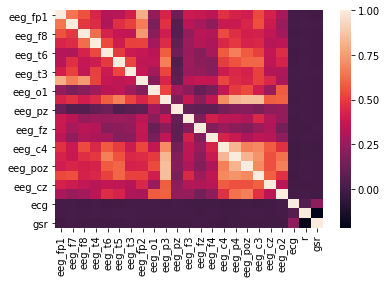

In [8]:
sns.heatmap(corr_matrix)

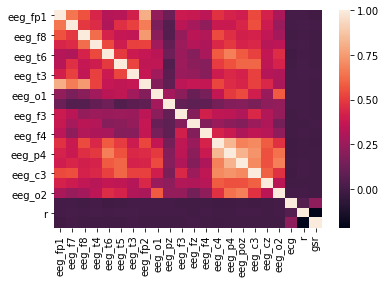

In [22]:
sns.heatmap(df_train.loc[:, 'eeg_fp1':'gsr'].drop(["eeg_p3"], axis=1).corr())

#### Mean features values

In [29]:
df_train.loc[:, 'eeg_fp1':'gsr'].mean()

eeg_fp1       3.746336
eeg_f7        1.360002
eeg_f8        1.213644
eeg_t4        0.073509
eeg_t6        0.078455
eeg_t5        0.086755
eeg_t3        0.229991
eeg_fp2       3.627284
eeg_o1        0.183648
eeg_p3        0.265057
eeg_pz        0.440722
eeg_f3        1.385392
eeg_fz        1.316266
eeg_f4        1.208597
eeg_c4        0.605005
eeg_p4        0.241397
eeg_poz       0.194763
eeg_c3        0.624371
eeg_cz        0.442912
eeg_o2        0.239374
ecg        5285.460060
r           737.608980
gsr         851.846703
dtype: float64

# Preprocessing data

In [48]:
X, y = df_train.drop(['experiment', 'time', 'eeg_p3', 'event'], axis=1), df_train['event']

In [52]:
means_, stds_ = X.mean(axis=0), X.std(axis=0)
means_[0] = means_[1] = 0
stds_[0] = stds_[1] = 1
X_norm = (X - means_) / stds_

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm, y,
                                                    stratify=y, 
                                                    shuffle=True,
                                                    test_size=0.25, 
                                                    random_state=4)

# Base line modeling

### Logistic regressor with penalty = None

In [31]:
log_regressor_none = LogisticRegression(penalty="none", multi_class="multinomial", solver="saga", random_state=4)

In [32]:
log_regressor_none.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=4, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_proba_predictions = log_regressor_none.predict_proba(X_test)
log_loss(y_test, y_proba_predictions, eps=(10 ** - 15))

0.9166622832731919


### Grid search

In [12]:
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio' : [0, 0.2, 0.4, 0.6, 0.8, 1]
}

In [13]:
log_regressor = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', random_state=4)

In [14]:
cv = model_selection.StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=4)

In [15]:
optimizer = model_selection.GridSearchCV(log_regressor, param_grid, scoring='neg_log_loss', cv=cv)

In [16]:
%%time
optimizer.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Wall time: 6h 18min


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=4, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=4, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [17]:
optimizer.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='elasticnet',
                   random_state=4, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
optimizer.best_params_

{'C': 0.01, 'l1_ratio': 0.2}

In [21]:
y_proba_predictions_grid = optimizer.best_estimator_.predict_proba(X_test)
log_loss(y_test, y_proba_predictions_grid, eps=(10 ** - 15))

0.9146625155380873

# Submission

In [82]:
X_test_res = df_test.drop(['id', 'experiment', 'time', 'eeg_p3'], axis=1)

In [83]:
means_test, stds_test = X_test_res.mean(axis=0), X_test_res.std(axis=0)
means_test[0] = means_test[1] = 0
stds_test[0] = stds_test[1] = 1
X_norm_test = (X_test_res - means_test) / stds_test

In [93]:
result = pd.DataFrame(np.concatenate((np.arange(len(df_test))[:, np.newaxis], 
                                      optimizer.best_estimator_.predict_proba(X_norm_test)), axis=1), 
                          columns=['id', 'A', 'B', 'C', 'D'])
result['id'] = result['id'].astype(int)

In [95]:
result.head()

,id,A,B,C,D
0,0,0.543778,0.025828,0.387813,0.042581
1,1,0.588674,0.023897,0.340441,0.046988
2,2,0.543489,0.025818,0.388234,0.042459
3,3,0.588510,0.023789,0.340765,0.046936
4,4,0.543637,0.025930,0.388522,0.041912


In [96]:
result.to_csv("submission.csv", index=False)